# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [ ]:
#1-#5 are in file named "a2_question1.pdf" in Github

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [ ]:
%pip install pandas
%pip install fastparquet
%pip install pandas xlrd
%pip install matplotlib
%pip install seaborn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

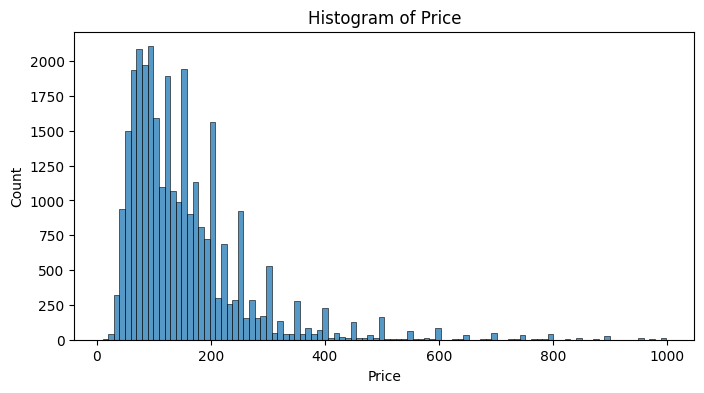

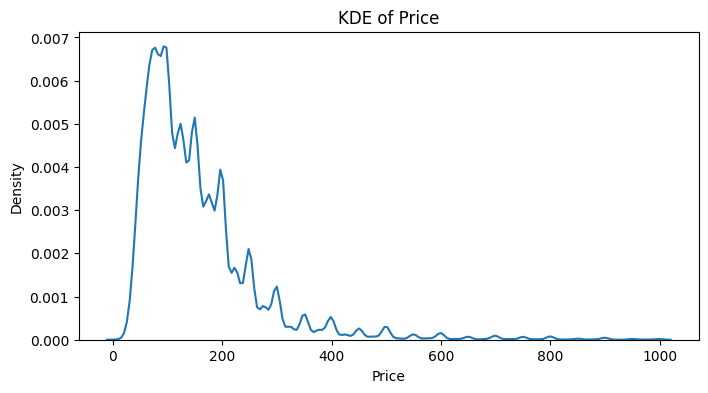

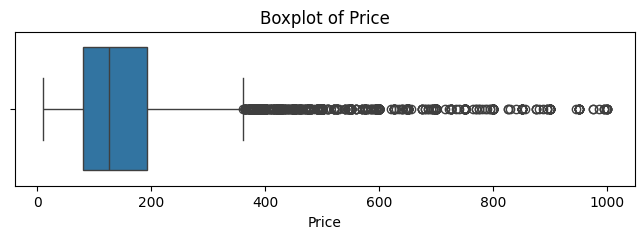

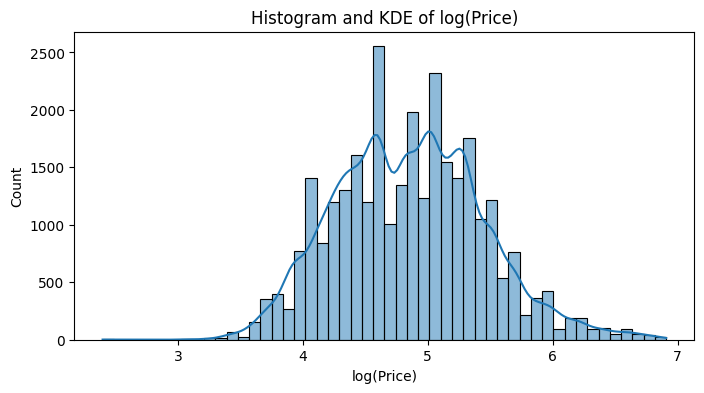

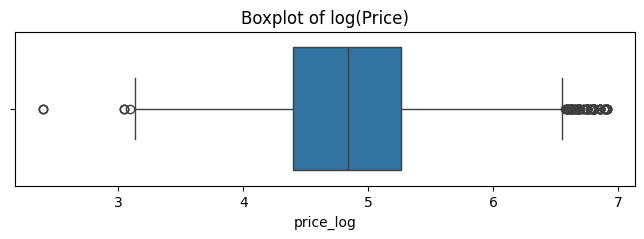

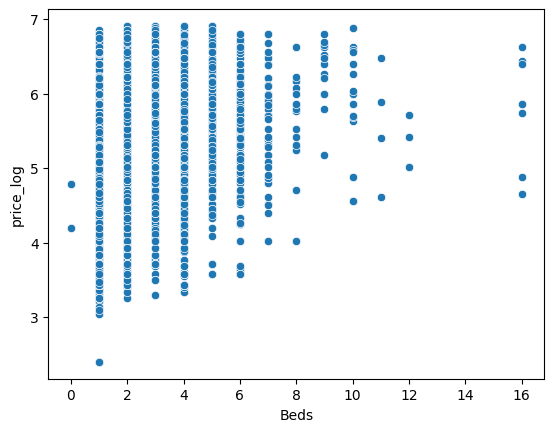

            mean         std    50%
Beds                               
0.0    92.000000   38.183766   92.0
1.0   124.757670   75.685752  100.0
2.0   186.702332  115.044205  160.0
3.0   234.928043  142.288189  200.0
4.0   280.554830  175.512312  240.0
5.0   322.000000  190.319415  285.0
6.0   316.313253  201.157585  271.0
7.0   341.377778  220.116631  300.0
8.0   331.850000  155.652202  339.5
9.0   587.142857  208.351721  625.0
10.0  442.200000  263.926992  400.0
11.0  332.250000  236.798613  289.5
12.0  225.000000   75.000000  225.0
16.0  402.250000  235.093143  350.0


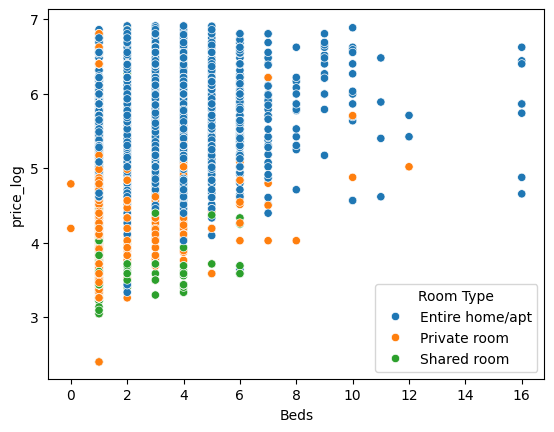

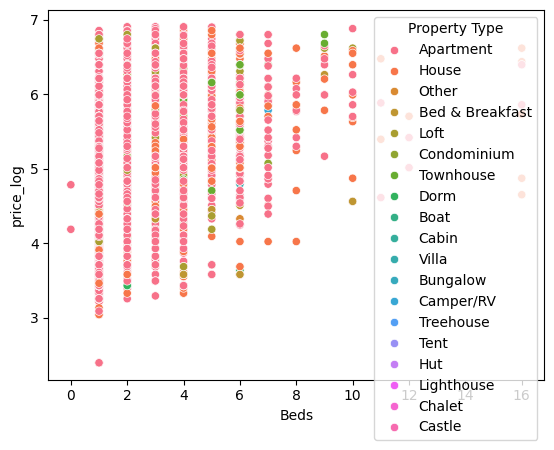

                                       mean         std    50%
Room Type       Property Type                                 
Entire home/apt Other            290.800000  273.526273  177.5
                Loft             284.910290  184.515517  220.0
                Condominium      281.126761  175.313998  200.0
                Cabin            250.000000         NaN  250.0
                Townhouse        242.037037  166.755243  189.0
                House            234.554633  159.785974  188.0
                Villa            206.333333   89.667906  200.0
                Apartment        200.210161  109.967435  175.0
                Bed & Breakfast  184.538462  119.814172  130.0
Private room    Other            176.642857  141.484252  114.0
Shared room     Treehouse        167.666667  114.788211  108.0
Entire home/apt Boat             158.428571   51.110524  150.0
                Bungalow         150.750000   46.464144  160.5
Private room    Castle           150.000000         NaN

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1
df = pd.read_csv("./data/airbnb_hw.csv")

# 2
df.shape # dimensions, how many observations are there
df.columns # variables included
df.head() # view the first few rows of your dataframe
df.info() # give a concise summary of the dataframe’s structure

# 3
ct = pd.crosstab(df["Room Type"], df["Property Type"])
print(ct)

# 4
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# histogram
plt.figure(figsize=(8,4))
sns.histplot(df["Price"], bins=100)
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# kernel density
plt.figure(figsize=(8,4))
sns.kdeplot(df["Price"], bw_adjust=0.5)
plt.title("KDE of Price")
plt.xlabel("Price")
plt.show()

# box plot
plt.figure(figsize=(8,2))
sns.boxplot(x=df["Price"])
plt.title("Boxplot of Price")
plt.show()

# statistical description
df["Price"].describe()

# transform price into a new variable
df["price_log"] = np.log1p(df["Price"])

# histogram and kernel density
plt.figure(figsize=(8,4))
sns.histplot(df["price_log"], bins=50, kde=True)
plt.title("Histogram and KDE of log(Price)")
plt.xlabel("log(Price)")
plt.show()

# box plot
plt.figure(figsize=(8,2))
sns.boxplot(x=df["price_log"])
plt.title("Boxplot of log(Price)")
plt.show()

# statistical description
df["price_log"].describe()

# 5
# scatterplot of price_log and Beds.
sns.scatterplot(x="Beds", y="price_log", data=df)
plt.show()

# compute a desciption of Price conditional on/grouped by the number of beds
grouped = df.groupby("Beds")["Price"].describe()
print(grouped[["mean", "std", "50%"]])  # mean, std, median

# 6
# scatterplot of price_log and Beds, but color the graph by Room Type and Property Type
sns.scatterplot(x="Beds", y="price_log", hue="Room Type", data=df)
plt.show()

# description of Price conditional on Room Type and Property Type
sns.scatterplot(x="Beds", y="price_log", hue="Property Type", data=df)
plt.show()

grouped2 = df.groupby(["Room Type", "Property Type"])["Price"].describe()
print(grouped2[["mean", "std", "50%"]].sort_values("mean", ascending=False))


Question 3

After cross-tabulating Room Type and Property Type, we see that most apartments and houses are listed as “Entire home/apt.” Private rooms are relatively more common in townhouses, shared houses, and some lofts, where renting individual rooms is feasible. Shared rooms are rare and mostly appear in hostels or shared accommodations.

Question 4

The raw Price distribution is highly skewed to the right, with many low-priced listings and some extreme high-priced outliers. The mean is inflated relative to the median, and the standard deviation is large, indicating badly scaled data. After applying a log transformation (price_log = log(Price + 1)), the distribution becomes more symmetric, outliers are compressed, and the variable is better scaled for analysis.

Question 5
 
The scatterplot shows that log-transformed price generally increases with the number of beds, but there is substantial variability. Grouping by the number of beds shows that the average price increases as beds increase, and the standard deviation also grows with bed count. The median is a more reliable measure of central tendency than the mean because extreme high-priced listings skew the mean upwards.

Question 6

Coloring the scatterplot by Room Type shows that private rooms cluster at lower prices, while entire homes/apartments cover a wide price range. Shared rooms are rare and cheap. Coloring by Property Type reveals that luxury properties (Lofts, Townhouses) dominate higher prices, whereas Apartments and Houses dominate mid-range prices. Grouping by both Room Type and Property Type, we see that Entire home/apt in Lofts or Townhouses has the highest average price and standard deviation. Because of the extreme high-priced listings, the median is a more reliable measure of central tendency than the mean.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

First 5 rows of the data:
           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                 

C:\Users\huyen\AppData\Local\Temp\ipykernel_60592\1988966336.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['Month'])


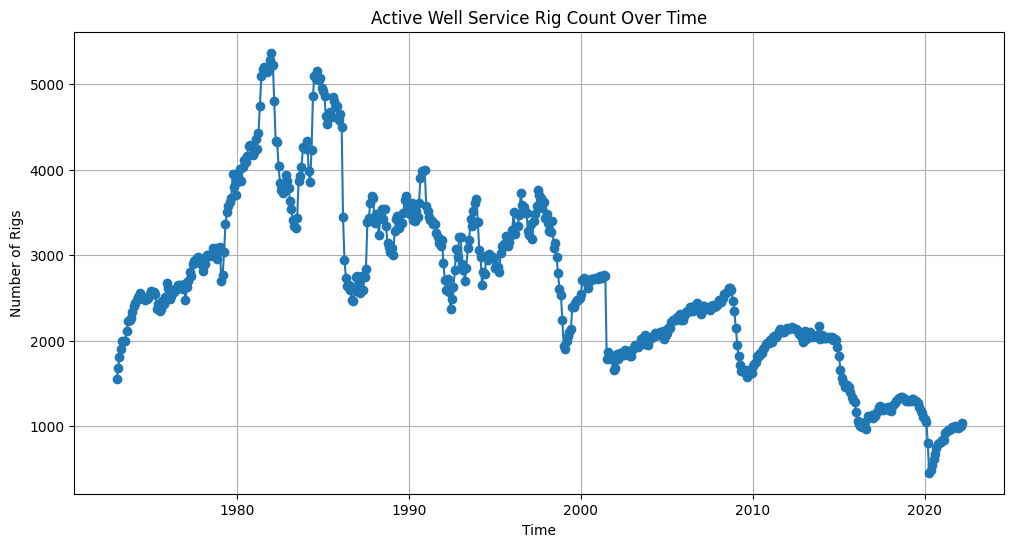

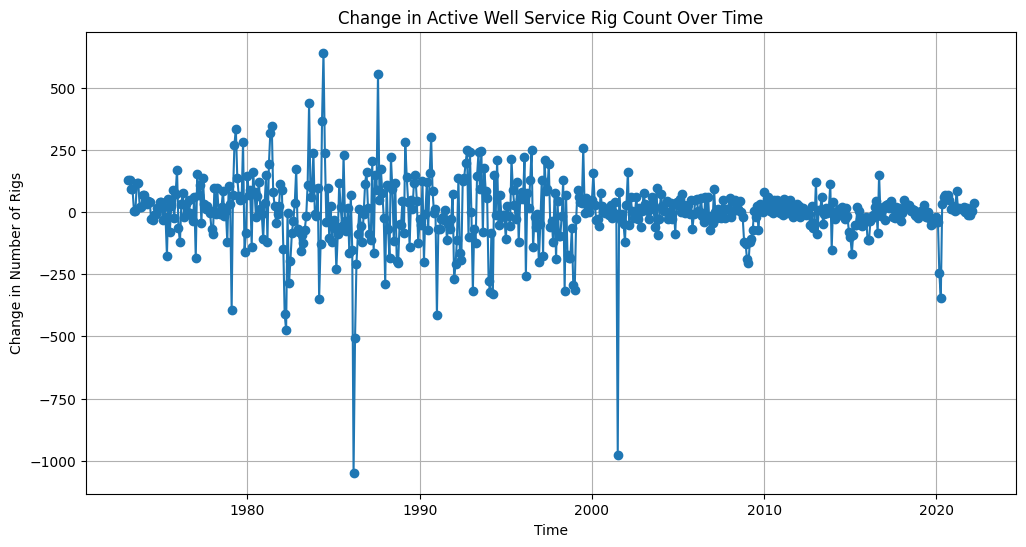

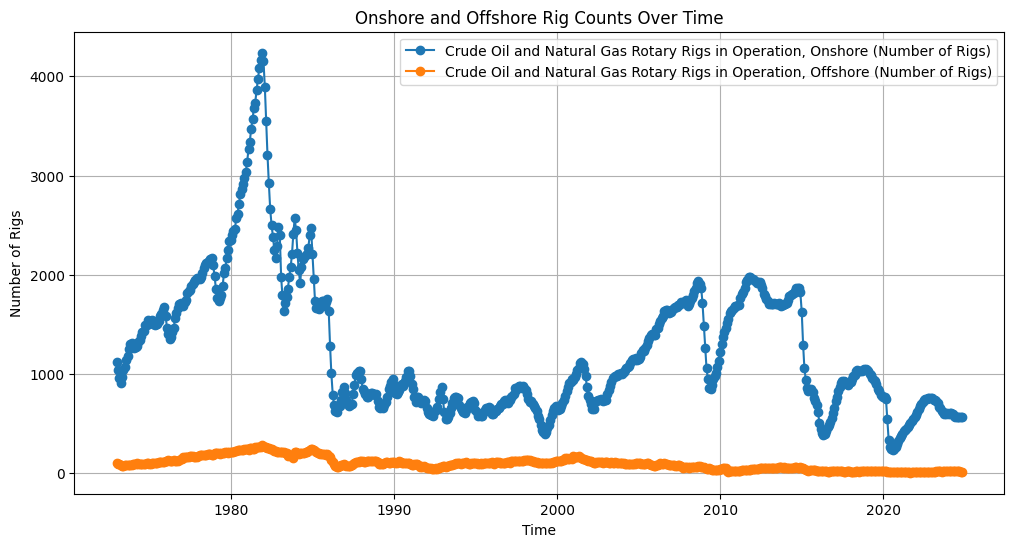

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1
df = pd.read_csv("./data/drilling_rigs.csv")

# examine the first few rows
print("First 5 rows of the data:")
print(df.head())

# How many observations? How many variables?
print("\nShape of the data (observations, variables):", df.shape)

# check the data types of each column
print("\nData types and non-null counts:")
print(df.info())

# identify which numeric variables may need to be coerced
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()

print("\nColumns currently numeric:", numeric_columns)
print("Columns currently object (may need conversion):", object_columns)

# 2
# convert the `Month` variable to an ordered datetime variable
df['time'] = pd.to_datetime(df['Month'], format='mixed')

for c in df.columns:
    if c not in ('Month', 'time'):
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 3
# make a line plot of this time series
df['time'] = pd.to_datetime(df['Month'])

rig_col = 'Active Well Service Rig Count (Number of Rigs)'
df[rig_col] = pd.to_numeric(df[rig_col], errors='coerce')

df = df.sort_values('time')

plt.figure(figsize=(12,6))
plt.plot(df['time'], df[rig_col], marker='o', linestyle='-')
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.show()

# 4
rig_col = 'Active Well Service Rig Count (Number of Rigs)'

df[rig_col] = pd.to_numeric(df[rig_col], errors='coerce')

df = df.sort_values('time')

df['rig_change'] = df[rig_col].diff()

plt.figure(figsize=(12,6))
plt.plot(df['time'], df['rig_change'], marker='o', linestyle='-')
plt.title('Change in Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.grid(True)
plt.show()

# 5
onshore_col = df.columns[1]
offshore_col = df.columns[2]

df_melted = df.melt(id_vars=['time'], 
                    value_vars=[onshore_col, offshore_col],
                    var_name='Rig Type', 
                    value_name='Rig Count')

# Ensure numeric
df_melted['Rig Count'] = pd.to_numeric(df_melted['Rig Count'], errors='coerce')

# Plot the series
plt.figure(figsize=(12,6))
for rig_type in df_melted['Rig Type'].unique():
    subset = df_melted[df_melted['Rig Type'] == rig_type]
    plt.plot(subset['time'], subset['Rig Count'], marker='o', linestyle='-', label=rig_type)

plt.title('Onshore and Offshore Rig Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.legend()
plt.grid(True)
plt.show()


Question 1

The dataset drilling_rigs.csv contains information on drilling rigs, with each row representing a rig and each column representing a variable such as rig type, location, operational status, and technical specifications. The number of observations corresponds to the number of rows, and the number of variables corresponds to the number of columns. Upon examining the data, some numeric variables may have been read as text due to missing values, inconsistent formatting, or non-numeric characters. Cleaning the data will require converting these columns to appropriate numeric types, handling missing values, standardizing categorical variables, and correcting formatting issues to ensure accurate analysis.

Question 3

The line plot of active rigs over time shows that the total number of rigs fluctuates throughout the period. There are periods of growth and decline, likely reflecting market conditions, oil prices, or operational factors. Some sharp drops indicate sudden reductions in rig activity, while periods of stability suggest consistent operations. Overall, the time series captures both long-term trends and short-term variability in the number of active rigs.

Question 4

The first-difference plot shows that changes in rig counts fluctuate over time, with both positive and negative values. There are periods of steady growth and periods of sharp declines, indicating volatility in rig activity. Large spikes or drops may correspond to market events, policy changes, or oil price shocks. Overall, the first-difference plot makes it easier to see short-term dynamics in rig activity compared to the raw levels.